In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
import seaborn
seaborn.set()

In [3]:
# 支持中文
# 就是那个文件的文件名，记得对照大小写
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [4]:
orders_df = pd.read_excel("data/某公司销售数据-标准.xls")
orders_df.head()

,订单号,日期,顾客姓名,订单等级,订单数量,销售额,折扣点,运输方式,利润,单价,运输成本,区域,省份,城市,产品类别,产品子类别,产品名称,产品包箱,运送日期
0,3,2010-10-13,李鹏晨,低级,6,261.5400,0.04,火车,-213.250,38.94,35.00,华北,河北,石家庄,办公用品,容器，箱子,"Eldon Base for stackable storage shelf, platinum",大型箱子,2010-10-20
1,6,2012-02-20,王勇民,其它,2,6.0000,0.01,火车,-4.640,2.08,2.56,华南,河南,郑州,办公用品,剪刀，尺子，锯,Kleencut® Forged Office Shears by Acme United ...,小型包裹,2012-02-21
2,32,2011-07-15,姚文文,高级,26,2808.0800,0.07,火车,1054.820,107.53,5.81,华南,广东,汕头,家具产品,办公装饰品,Tenex Contemporary Contur Chairmats for Low an...,中型箱子,2011-07-17
3,32,2011-07-15,姚文文,高级,24,1761.4000,0.09,大卡,-1748.560,70.89,89.30,华北,内蒙古,呼和浩特,家具产品,桌子,KI Conference Tables,巨型纸箱,2011-07-16
4,32,2011-07-15,姚文文,高级,23,160.2335,0.04,火车,-85.129,7.99,5.03,华北,内蒙古,呼和浩特,技术产品,电话通信产品,Bell Sonecor JB700 Caller ID,中型箱子,2011-07-17


In [5]:
orders_df.isnull().any()

订单号      False
日期       False
顾客姓名     False
订单等级     False
订单数量     False
销售额      False
折扣点      False
运输方式     False
利润       False
单价       False
运输成本     False
区域       False
省份       False
城市       False
产品类别     False
产品子类别    False
产品名称     False
产品包箱     False
运送日期     False
dtype: bool

In [6]:
# 没有缺失值
orders_df.isnull().any()[orders_df.isnull().any()]

Series([], dtype: bool)

In [7]:
orders_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8568 entries, 0 to 8567
Data columns (total 19 columns):
订单号      8568 non-null int64
日期       8568 non-null datetime64[ns]
顾客姓名     8568 non-null object
订单等级     8568 non-null object
订单数量     8568 non-null int64
销售额      8568 non-null float64
折扣点      8568 non-null float64
运输方式     8568 non-null object
利润       8568 non-null float64
单价       8568 non-null float64
运输成本     8568 non-null float64
区域       8568 non-null object
省份       8568 non-null object
城市       8568 non-null object
产品类别     8568 non-null object
产品子类别    8568 non-null object
产品名称     8568 non-null object
产品包箱     8568 non-null object
运送日期     8568 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(5), int64(2), object(10)
memory usage: 7.8 MB


In [8]:
# 把省份里的Jiangsu替换成汉子
orders_df["省份"].replace({"Jiangsu":"江苏"}, inplace=True)
orders_df["省份"].unique()

array(['河北', '河南', '广东', '内蒙古', '辽宁', '吉林', '湖北', '广西', '北京', '甘肃', '四川',
       '海南', '福建', '天津', '新疆', '山西', '上海', '浙江', '安徽', '江西', '陕西', '黑龙江',
       '湖南', '西藏', '宁夏', '江苏', '重庆', '贵州', '山东', '青海', '云南'], dtype=object)

In [9]:
orders_df['顾客姓名'].unique().size

772

In [10]:
# 怎么是object类型
orders_df.apply(lambda column: (column.unique().size, column.dtype) ).sort_values()

运输方式        (3, object)
产品类别        (3, object)
订单等级        (4, object)
区域          (6, object)
产品包箱        (7, object)
折扣点        (16, object)
产品子类别      (17, object)
省份         (31, object)
订单数量       (50, object)
城市        (252, object)
运输成本      (651, object)
单价        (750, object)
顾客姓名      (772, object)
产品名称     (1277, object)
日期       (1417, object)
运送日期     (1450, object)
订单号      (5489, object)
利润       (7959, object)
销售额      (8124, object)
dtype: object

In [11]:
sorted([( column, orders_df[column].unique().size, str(orders_df[column].dtype) ) 
        for column in orders_df.columns if orders_df[column].dtype == np.object], 
       key=lambda x: x[1])

[('运输方式', 3, 'object'),
 ('产品类别', 3, 'object'),
 ('订单等级', 4, 'object'),
 ('区域', 6, 'object'),
 ('产品包箱', 7, 'object'),
 ('产品子类别', 17, 'object'),
 ('省份', 31, 'object'),
 ('城市', 252, 'object'),
 ('顾客姓名', 772, 'object'),
 ('产品名称', 1277, 'object')]

In [12]:
pd.DataFrame(data= sorted([( column, orders_df[column].unique().size, str(orders_df[column].dtype) ) 
        for column in orders_df.columns if orders_df[column].dtype == np.object],key=lambda x: x[1]))

,0,1,2
0,运输方式,3,object
1,产品类别,3,object
2,订单等级,4,object
3,区域,6,object
4,产品包箱,7,object
5,产品子类别,17,object
6,省份,31,object
7,城市,252,object
8,顾客姓名,772,object
9,产品名称,1277,object


In [13]:
categoryMap = {column: "category"
        for column in orders_df.columns 
        if orders_df[column].dtype == np.object and orders_df[column].unique().size < 300}
categoryMap

{'订单等级': 'category',
 '运输方式': 'category',
 '区域': 'category',
 '省份': 'category',
 '城市': 'category',
 '产品类别': 'category',
 '产品子类别': 'category',
 '产品包箱': 'category'}

In [14]:
orders_df = orders_df.astype(categoryMap)
orders_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8568 entries, 0 to 8567
Data columns (total 19 columns):
订单号      8568 non-null int64
日期       8568 non-null datetime64[ns]
顾客姓名     8568 non-null object
订单等级     8568 non-null category
订单数量     8568 non-null int64
销售额      8568 non-null float64
折扣点      8568 non-null float64
运输方式     8568 non-null category
利润       8568 non-null float64
单价       8568 non-null float64
运输成本     8568 non-null float64
区域       8568 non-null category
省份       8568 non-null category
城市       8568 non-null category
产品类别     8568 non-null category
产品子类别    8568 non-null category
产品名称     8568 non-null object
产品包箱     8568 non-null category
运送日期     8568 non-null datetime64[ns]
dtypes: category(8), datetime64[ns](2), float64(5), int64(2), object(2)
memory usage: 2.4 MB


In [15]:
orders_df.describe()

,订单号,订单数量,销售额,折扣点,利润,单价,运输成本
count,8568.000000,8568.000000,8568.000000,8568.000000,8568.000000,8568.000000,8568.000000
mean,30602.762488,25.545051,1768.746528,0.049442,180.799484,88.387499,12.877333
std,17649.914314,14.488302,3562.293094,0.031909,1180.408325,279.091951,17.278186
min,3.000000,1.000000,2.240000,0.000000,-14140.701600,0.990000,0.490000
25%,15302.250000,13.000000,143.625250,0.020000,-83.432000,6.480000,3.300000
50%,30532.000000,26.000000,448.165000,0.050000,-1.560000,20.990000,6.125000
75%,45741.000000,38.000000,1699.635750,0.080000,162.123500,89.870000,13.990000
max,59988.000000,50.000000,89061.050000,0.250000,27220.690000,6783.020000,164.730000


In [16]:
orders_df.head(3)

,订单号,日期,顾客姓名,订单等级,订单数量,销售额,折扣点,运输方式,利润,单价,运输成本,区域,省份,城市,产品类别,产品子类别,产品名称,产品包箱,运送日期
0,3,2010-10-13,李鹏晨,低级,6,261.54,0.04,火车,-213.25,38.94,35.00,华北,河北,石家庄,办公用品,容器，箱子,"Eldon Base for stackable storage shelf, platinum",大型箱子,2010-10-20
1,6,2012-02-20,王勇民,其它,2,6.00,0.01,火车,-4.64,2.08,2.56,华南,河南,郑州,办公用品,剪刀，尺子，锯,Kleencut® Forged Office Shears by Acme United ...,小型包裹,2012-02-21
2,32,2011-07-15,姚文文,高级,26,2808.08,0.07,火车,1054.82,107.53,5.81,华南,广东,汕头,家具产品,办公装饰品,Tenex Contemporary Contur Chairmats for Low an...,中型箱子,2011-07-17


In [17]:
# 按照日期排序
orders_df = orders_df.sort_values("日期").reset_index(drop=True)
orders_df.head(3)

,订单号,日期,顾客姓名,订单等级,订单数量,销售额,折扣点,运输方式,利润,单价,运输成本,区域,省份,城市,产品类别,产品子类别,产品名称,产品包箱,运送日期
0,28774,2009-01-01,陈平东,高级,32,180.36,0.10,火车,-111.80,5.98,4.69,华东,安徽,淮北,办公用品,容器，箱子,"Perma STOR-ALL™ Hanging File Box, 13 1/8""W x 1...",小型箱子,2009-01-02
1,13729,2009-01-01,张晨,其它,9,872.48,0.08,空运,-342.91,95.99,35.00,华南,广东,广州,办公用品,容器，箱子,Safco Industrial Wire Shelving,大型箱子,2009-01-03
2,44069,2009-01-02,翁瑞光,中级,16,137.63,0.09,空运,26.71,9.11,2.15,华南,广东,清远,办公用品,纸张,Wilson Jones 14 Line Acrylic Coated Pressboard...,打包纸袋,2009-01-04


In [18]:
# 删除这几列
orders_df.drop(['订单号', '折扣点', '运送日期'], axis=1, inplace=True)
orders_df.head(3)

,日期,顾客姓名,订单等级,订单数量,销售额,运输方式,利润,单价,运输成本,区域,省份,城市,产品类别,产品子类别,产品名称,产品包箱
0,2009-01-01,陈平东,高级,32,180.36,火车,-111.80,5.98,4.69,华东,安徽,淮北,办公用品,容器，箱子,"Perma STOR-ALL™ Hanging File Box, 13 1/8""W x 1...",小型箱子
1,2009-01-01,张晨,其它,9,872.48,空运,-342.91,95.99,35.00,华南,广东,广州,办公用品,容器，箱子,Safco Industrial Wire Shelving,大型箱子
2,2009-01-02,翁瑞光,中级,16,137.63,空运,26.71,9.11,2.15,华南,广东,清远,办公用品,纸张,Wilson Jones 14 Line Acrylic Coated Pressboard...,打包纸袋


Text(0, 0.5, '订单数')

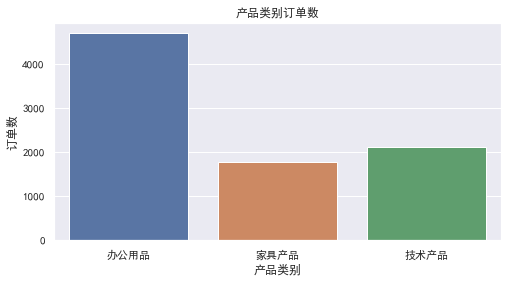

In [19]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(x="产品类别", data=orders_df, ax=ax)
ax.set_title('产品类别订单数')
ax.set_ylabel('订单数')

In [20]:
orders_df.groupby("产品类别").aggregate({"订单数量": "count"})

,订单数量
产品类别,
办公用品,4694
家具产品,1769
技术产品,2105


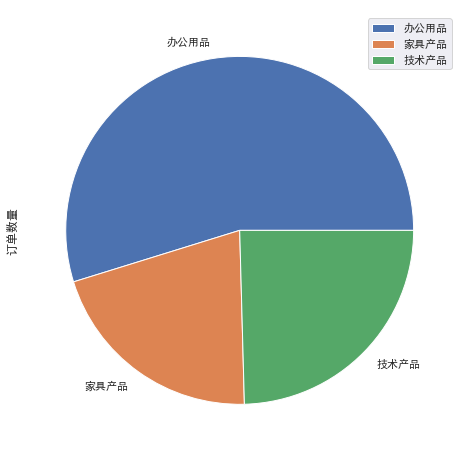

In [21]:
orders_df.groupby("产品类别").aggregate({"订单数量": "count"}).plot.pie(y= "订单数量", figsize=(8, 8))

Text(0, 0.5, '订单数')

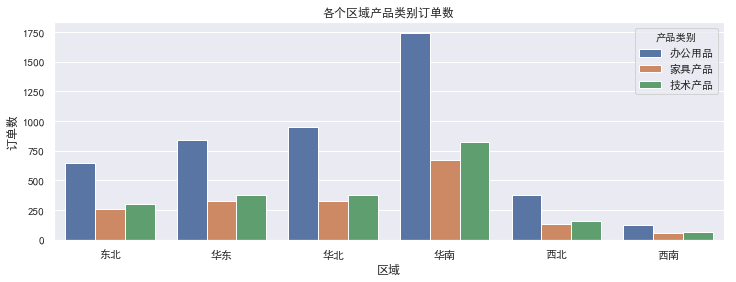

In [22]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.countplot(x='区域', hue="产品类别", data=orders_df, ax=ax)
ax.set_title('各个区域产品类别订单数')
ax.set_ylabel('订单数')

In [23]:
orders_df.groupby(["区域","产品类别"])["订单数量"].count().unstack()

产品类别,办公用品,家具产品,技术产品
区域,,,
东北,650,256,304
华东,843,328,374
华北,953,330,377
华南,1745,671,825
西北,377,129,156
西南,126,55,69


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000202BB40D278>,
      dtype=object)

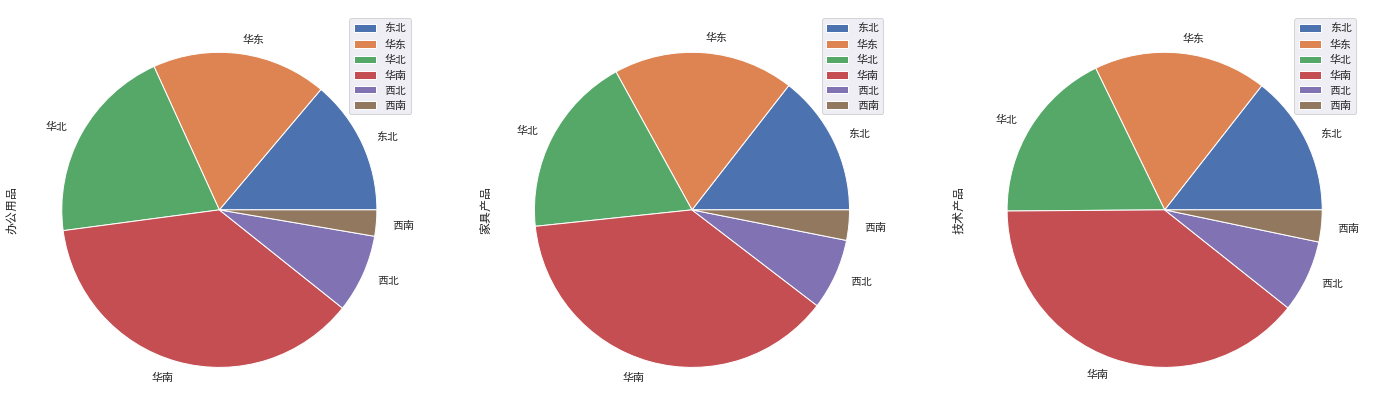

In [24]:
# 每个列画一个子图
orders_df.groupby(["区域","产品类别"])["订单数量"].count().unstack().plot.pie(subplots=True, figsize=(24, 8))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000202BB6DE518>,
      dtype=object)

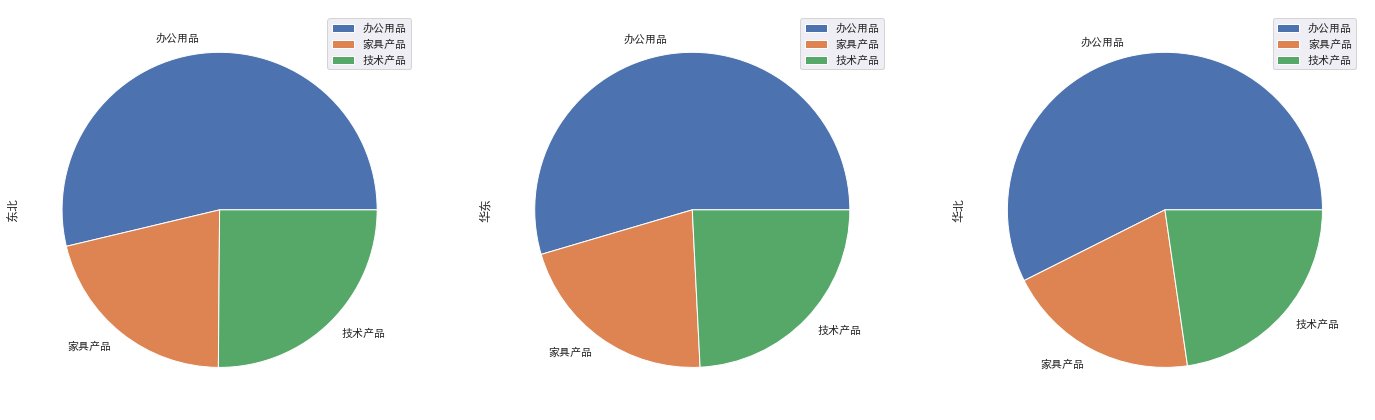

In [25]:
orders_df.groupby(["产品类别", "区域"])["订单数量"].count().unstack().iloc[:,:3].plot.pie(subplots=True, figsize=(24, 8))

In [26]:
# 还是透析表好用
orders_df.pivot_table(values="订单数量", index=["区域"], columns=["产品类别"], aggfunc='count')

产品类别,办公用品,家具产品,技术产品
区域,,,
东北,650,256,304
华东,843,328,374
华北,953,330,377
华南,1745,671,825
西北,377,129,156
西南,126,55,69


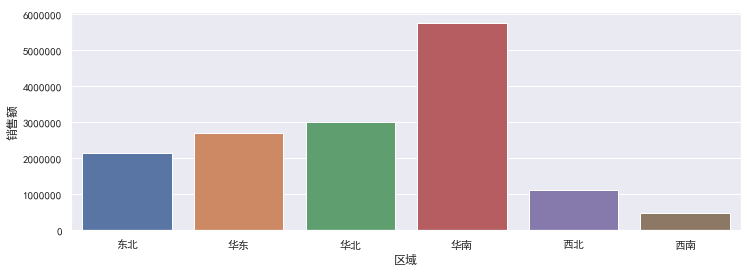

In [27]:
fig, ax = plt.subplots(figsize=(12, 4))
ax = sns.barplot(x='区域', y="销售额", data=orders_df, estimator=np.sum, ci=None)

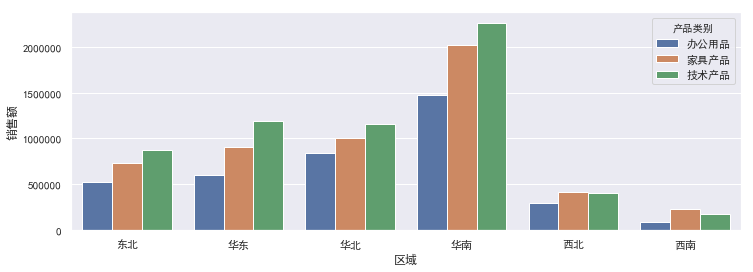

In [28]:
fig, ax = plt.subplots(figsize=(12, 4))
ax = sns.barplot(x='区域', y="销售额" ,hue="产品类别", data=orders_df, estimator=np.sum, ci=None)

In [29]:
np.set_printoptions(suppress=True, threshold=np.nan)
#suppress=True 取消科学记数法
#threshold=np.nan 完整输出（没有省略号）

pd.set_option('display.float_format', lambda x: '%.3f' % x)
#用pd.set_option设置display.float_format参数来设置显示的小数位数

In [30]:
# 还是透析表好用
orders_df.pivot_table(values="销售额", index=["区域"], columns=["产品类别"], aggfunc='sum')

产品类别,办公用品,家具产品,技术产品
区域,,,
东北,525068.060,730179.358,870703.335
华东,603407.000,906406.560,1190055.321
华北,835001.610,999021.864,1159796.911
华南,1476431.440,2016413.288,2264862.239
西北,293600.370,407403.702,402037.527
西南,84820.700,222970.854,166440.116


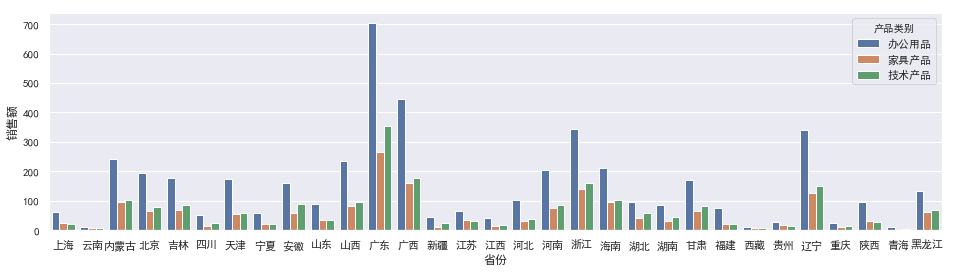

In [31]:
fig, ax = plt.subplots(figsize=(16, 4))
ax = sns.barplot(x='省份', y="销售额" ,hue="产品类别", data=orders_df, estimator=np.count_nonzero, ci=None)

In [32]:
orders_df.pivot_table(values="销售额", index=["区域", "省份"], columns=["产品类别"], aggfunc='count', margins=True)

产品类别        办公用品     家具产品     技术产品   All
区域  省份                                  
东北  吉林   178.000   69.000   87.000   334
    辽宁   339.000  126.000  149.000   614
    黑龙江  133.000   61.000   68.000   262
华东  上海    62.000   24.000   20.000   106
    安徽   162.000   58.000   89.000   309
    山东    90.000   34.000   36.000   160
    江苏    67.000   34.000   30.000   131
    江西    42.000   16.000   17.000    75
    浙江   343.000  140.000  160.000   643
    福建    77.000   22.000   22.000   121
华北  内蒙古  243.000   97.000  104.000   444
    北京   196.000   66.000   80.000   342
    天津   174.000   54.000   58.000   286
    山西   236.000   81.000   96.000   413
    河北   104.000   32.000   39.000   175
华南  广东   703.000  265.000  354.000  1322
    广西   445.000  160.000  178.000   783
    河南   205.000   77.000   87.000   369
    海南   211.000   96.000  103.000   410
    湖北    95.000   40.000   58.000   193
    湖南    86.000   33.000   45.000   164
西北  宁夏    57.000   21.000   20.000    98
    新疆    45.000   11.000   24.000    80
    甘肃   169.000   65.000   81.000   315
    陕西    96.000   30.000   27.000   153
    青海    10.000    2.000    4.000    16
西南  云南    11.000    7.000    7.000    25
    四川    51.000   14.000   25.000    90
    西藏    12.000    6.000    8.000    26
    贵州    28.000   17.000   13.000    58
    重庆    24.000   11.000   16.000    51
All     4694.000 1769.000 2105.000  8568

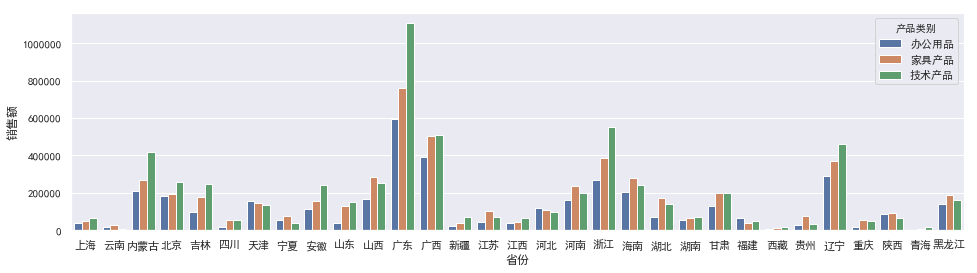

In [33]:
fig, ax = plt.subplots(figsize=(16, 4))
ax = sns.barplot(x='省份', y="销售额" ,hue="产品类别", data=orders_df, estimator=np.sum, ci=None)

In [34]:
orders_df.pivot_table(values="销售额", index=["区域", "省份"], columns=["产品类别"], aggfunc='sum', margins=True)

产品类别           办公用品        家具产品        技术产品          All
区域  省份                                                  
东北  吉林    96033.270  176326.222  245916.502   518275.994
    辽宁   287520.290  367954.256  462685.675  1118160.221
    黑龙江  141514.500  185898.880  162101.158   489514.538
华东  上海    38544.570   49331.164   62983.280   150859.014
    安徽   114610.480  156807.858  240290.574   511708.912
    山东    38298.670  127262.410  150678.565   316239.645
    江苏    43036.110  103288.472   72616.908   218941.490
    江西    37439.310   42788.122   63023.969   143251.401
    浙江   266807.600  386307.414  550370.191  1203485.205
    福建    64670.260   40621.120   50091.836   155383.215
华北  内蒙古  212015.120  269609.660  419612.245   901237.025
    北京   181311.920  193882.114  256406.286   631600.320
    天津   154676.940  144591.588  132711.655   431980.182
    山西   169649.750  284810.198  251303.616   705763.564
    河北   117347.880  106128.304   99763.109   323239.293
华南  广东   593735.710  761842.412 1106759.088  2462337.210
    广西   391379.120  501376.424  510676.399  1403431.943
    河南   163243.840  234289.388  197699.144   595232.371
    海南   205064.840  277978.230  241688.261   724731.331
    湖北    69585.290  173441.420  137894.620   380921.330
    湖南    53422.640   67485.414   70144.728   191052.781
西北  宁夏    53526.330   78174.864   40985.038   172686.232
    新疆    24689.880   37514.494   72606.314   134810.688
    甘肃   128469.080  196636.670  200319.015   525424.765
    陕西    84856.050   89901.174   68119.241   242876.465
    青海     2059.030    5176.500   20007.920    27243.450
西南  云南    16087.730   27667.120    6420.772    50175.622
    四川    16260.900   52849.610   56773.505   125884.015
    西藏     8867.940   12369.150   18707.680    39944.769
    贵州    25915.640   73764.214   32776.182   132456.036
    重庆    17688.490   56320.760   51761.977   125771.227
All     3818329.180 5282395.626 6053895.450 15154620.256

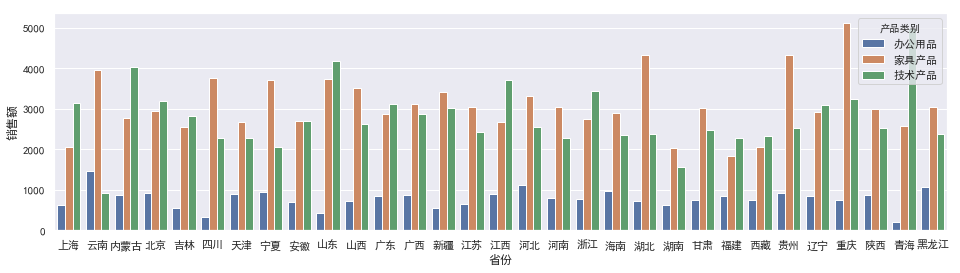

In [35]:
fig, ax = plt.subplots(figsize=(16, 4))
ax = sns.barplot(x='省份', y="销售额" ,hue="产品类别", data=orders_df, estimator=np.mean, ci=None)

In [36]:
orders_df.pivot_table(values="销售额", index=["区域", "省份"], columns=["产品类别"], aggfunc='mean').head()

产品类别       办公用品     家具产品     技术产品
区域 省份                            
东北 吉林   539.513 2555.452 2826.626
   辽宁   848.142 2920.272 3105.273
   黑龙江 1064.019 3047.523 2383.841
华东 上海   621.687 2055.465 3149.164
   安徽   707.472 2703.584 2699.894

In [37]:
orders_df.head(3)

,日期,顾客姓名,订单等级,订单数量,销售额,运输方式,利润,单价,运输成本,区域,省份,城市,产品类别,产品子类别,产品名称,产品包箱
0,2009-01-01,陈平东,高级,32,180.360,火车,-111.800,5.980,4.690,华东,安徽,淮北,办公用品,容器，箱子,"Perma STOR-ALL™ Hanging File Box, 13 1/8""W x 1...",小型箱子
1,2009-01-01,张晨,其它,9,872.480,空运,-342.910,95.990,35.000,华南,广东,广州,办公用品,容器，箱子,Safco Industrial Wire Shelving,大型箱子
2,2009-01-02,翁瑞光,中级,16,137.630,空运,26.710,9.110,2.150,华南,广东,清远,办公用品,纸张,Wilson Jones 14 Line Acrylic Coated Pressboard...,打包纸袋


In [38]:
customer_df = orders_df.groupby("顾客姓名").aggregate({"订单数量": ['count', 'sum'],"销售额":[np.sum],
              "区域": lambda x: x.iloc[0], "省份": lambda x: x.iloc[0]})
customer_df.head()

订单数量            销售额       区域       省份
     count  sum       sum <lambda> <lambda>
顾客姓名                                       
 严杰      6  203 11947.120       华北       天津
 刁琳      4   86  2469.010       东北       辽宁
 周游     14  502 27145.882       华南       广东
 闫杰      8  233 14699.210       西北       陕西
 陆路     10  211  8344.480       东北       辽宁

In [39]:
customer_df.columns = ["订单次数", "订单数", "销售额", "区域", "省份"]
customer_df.head()

,订单次数,订单数,销售额,区域,省份
顾客姓名,,,,,
严杰,6,203,11947.120,华北,天津
刁琳,4,86,2469.010,东北,辽宁
周游,14,502,27145.882,华南,广东
闫杰,8,233,14699.210,西北,陕西
陆路,10,211,8344.480,东北,辽宁


In [40]:
customer_df.sort_values("销售额", ascending=False)[:10]

,订单次数,订单数,销售额,区域,省份
顾客姓名,,,,,
郝磊,20,610,102044.052,西北,甘肃
杨肇辉,10,247,101593.688,华北,内蒙古
赵子武,62,1506,101227.912,华南,湖南
赵正玉,27,700,92759.052,华南,广东
高瑞光,42,1051,91334.729,华东,上海
朱永飞,20,530,85247.071,华东,安徽
张凤,18,450,83472.830,华南,海南
张玉,35,1015,80990.036,华东,安徽
杨高宁,52,1351,80899.849,东北,辽宁


In [41]:
customer_df.sort_values("销售额", ascending=False)[-10:]

,订单次数,订单数,销售额,区域,省份
顾客姓名,,,,,
朱华强,5,79,540.400,华北,天津
拜庆平,4,95,484.710,华东,浙江
包静,4,125,449.780,华南,广东
邱涛,2,29,350.180,东北,辽宁
路广鹏,2,39,317.790,华北,山西
邱钰,2,30,293.220,西北,宁夏
谢浩,3,71,285.730,西南,四川
李亚宾,2,59,234.270,西北,宁夏
周林,1,47,198.080,华南,海南


分析一下和时间有关的

In [42]:
t = orders_df["日期"][0]
t

Timestamp('2009-01-01 00:00:00')

In [43]:
(t, t.year, t.month, t.week, t.weekofyear, t.dayofweek )

(Timestamp('2009-01-01 00:00:00'), 2009, 1, 1, 1, 3)

In [44]:
t = orders_df["日期"].iloc[-1]
(t, t.year, t.month, t.week, t.weekofyear, t.dayofweek )

(Timestamp('2012-12-30 00:00:00'), 2012, 12, 52, 52, 6)

In [45]:
orders_df["year"] = orders_df["日期"].map(lambda d: d.year)
orders_df["month"] = orders_df["日期"].map(lambda d: d.month)
orders_df["weekofyear"] = orders_df["日期"].map(lambda d: d.weekofyear)
orders_df["dayofweek"] = orders_df["日期"].map(lambda d: d.dayofweek)
orders_df.head()

,日期,顾客姓名,订单等级,订单数量,销售额,运输方式,利润,单价,运输成本,区域,省份,城市,产品类别,产品子类别,产品名称,产品包箱,year,month,weekofyear,dayofweek
0,2009-01-01,陈平东,高级,32,180.360,火车,-111.800,5.980,4.690,华东,安徽,淮北,办公用品,容器，箱子,"Perma STOR-ALL™ Hanging File Box, 13 1/8""W x 1...",小型箱子,2009,1,1,3
1,2009-01-01,张晨,其它,9,872.480,空运,-342.910,95.990,35.000,华南,广东,广州,办公用品,容器，箱子,Safco Industrial Wire Shelving,大型箱子,2009,1,1,3
2,2009-01-02,翁瑞光,中级,16,137.630,空运,26.710,9.110,2.150,华南,广东,清远,办公用品,纸张,Wilson Jones 14 Line Acrylic Coated Pressboard...,打包纸袋,2009,1,1,4
3,2009-01-02,李逸辉,中级,43,614.800,火车,247.790,15.040,1.970,华南,广东,清远,办公用品,纸张,US Robotics 56K V.92 External Faxmodem,打包纸袋,2009,1,1,4
4,2009-01-02,胡子武,低级,43,4083.190,大卡,-1049.850,100.980,45.000,东北,辽宁,辽阳,家具产品,椅子,Hon Valutask™ Swivel Chairs,巨型木箱,2009,1,1,4


Text(0, 0.5, '销售总额')

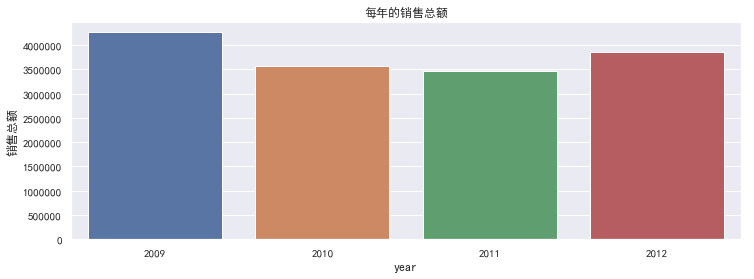

In [46]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.barplot(x='year', y='销售额', data=orders_df, ax=ax, estimator=np.sum, ci=None)
ax.set_title('每年的销售总额')
ax.set_ylabel('销售总额')

Text(0, 0.5, '销售总额')

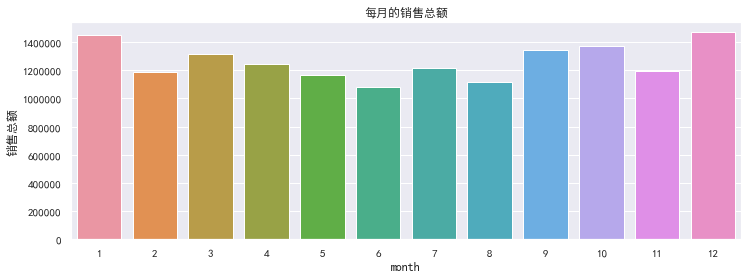

In [47]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.barplot(x='month', y='销售额', data=orders_df, ax=ax, estimator=np.sum, ci=None)
ax.set_title('每月的销售总额')
ax.set_ylabel('销售总额')

Text(0, 0.5, '销售总额')

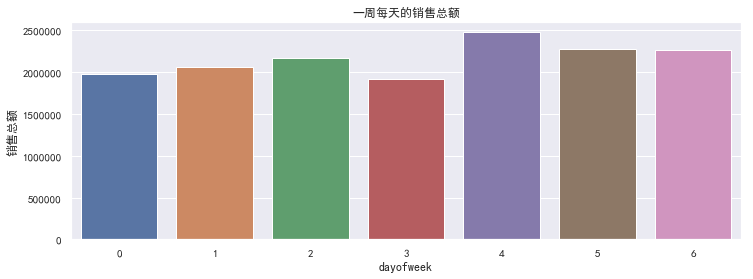

In [48]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.barplot(x='dayofweek', y='销售额', data=orders_df, ax=ax, estimator=np.sum, ci=None)
ax.set_title('一周每天的销售总额')
ax.set_ylabel('销售总额')

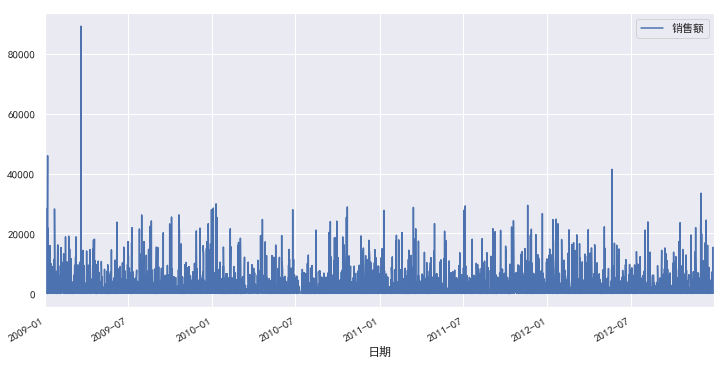

In [49]:
orders_df.plot(x='日期', y='销售额',figsize=(12, 6))

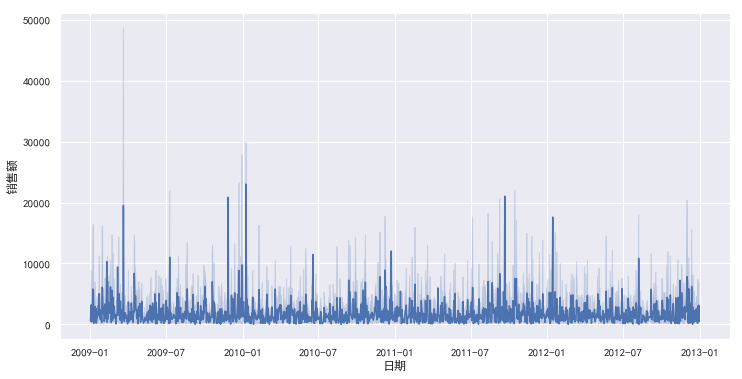

In [50]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x="日期", y="销售额", data=orders_df, ax=ax)

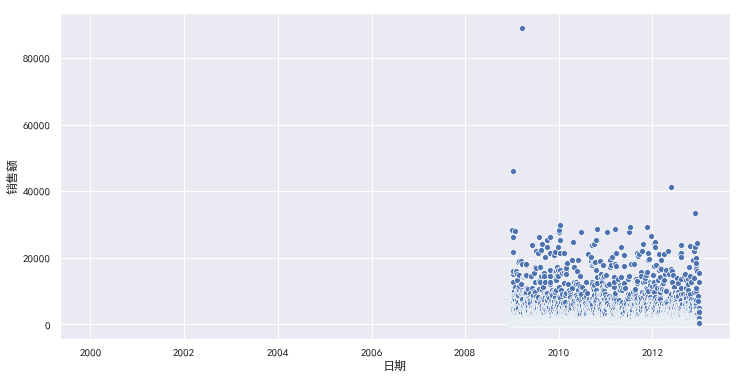

In [51]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.scatterplot(x="日期", y="销售额", data=orders_df, ax=ax)

上面的趋势图应该对每天的数据求和

In [52]:
date_sales =orders_df.groupby("日期").aggregate({"销售额": ["count", "sum"]})
date_sales.columns = ["订单数", "销售额"]
date_sales.head()

,订单数,销售额
日期,,
2009-01-01,2,1052.840
2009-01-02,6,11101.870
2009-01-03,10,31997.856
2009-01-04,3,1254.250
2009-01-05,15,39734.404


In [53]:
# 日期在索引上，方便切片
# 日期在列上，方便画图
date_sales = date_sales.reset_index()
date_sales = date_sales.set_index('日期', drop=False)
date_sales.head()

,日期,订单数,销售额
日期,,,
2009-01-01,2009-01-01,2,1052.840
2009-01-02,2009-01-02,6,11101.870
2009-01-03,2009-01-03,10,31997.856
2009-01-04,2009-01-04,3,1254.250
2009-01-05,2009-01-05,15,39734.404


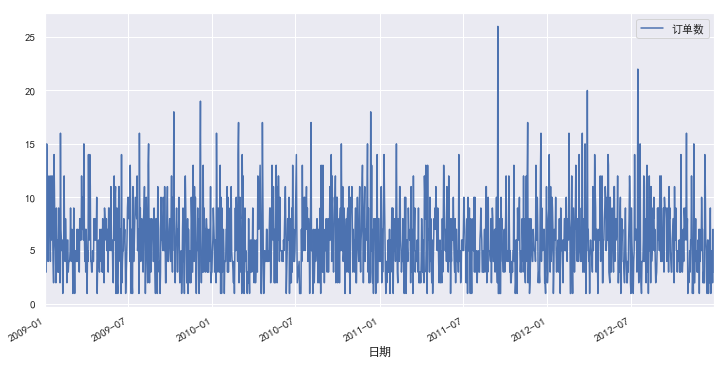

In [54]:
date_sales.plot(x='日期', y='订单数',figsize=(12, 6))

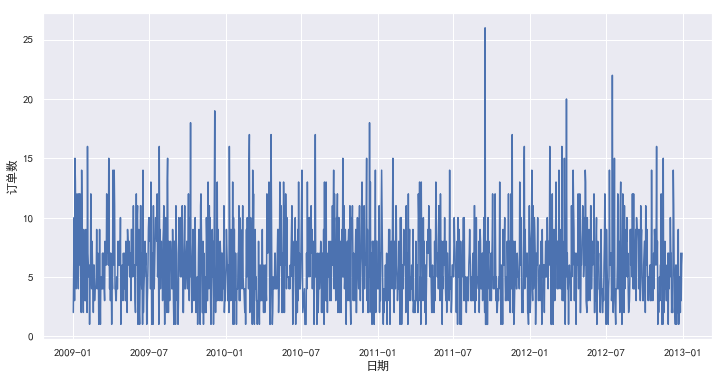

In [55]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.lineplot(x="日期", y="订单数", data=date_sales, ax=ax)

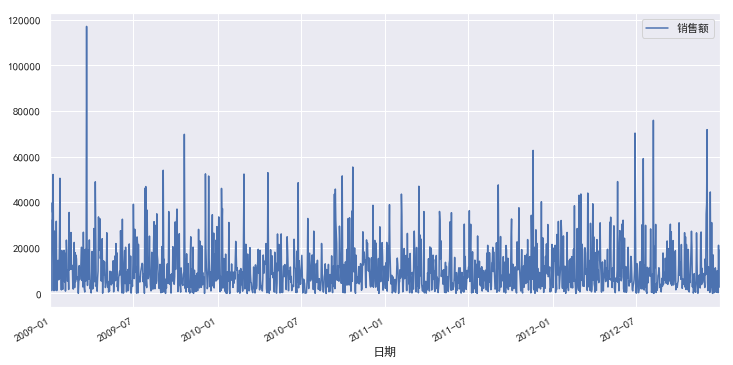

In [56]:
date_sales.plot(x='日期', y='销售额',figsize=(12, 6))

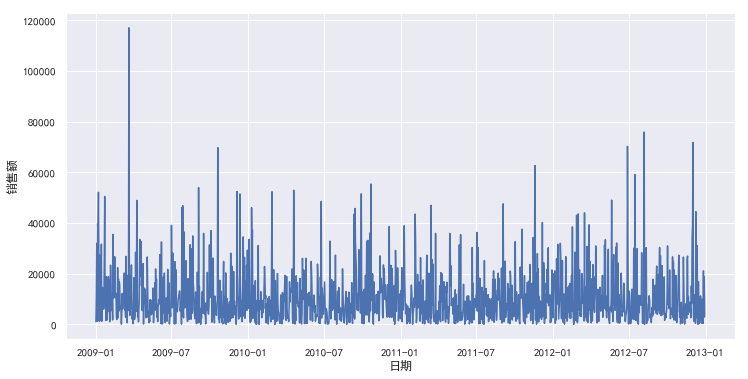

In [57]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.lineplot(x="日期", y="销售额", data=date_sales, ax=ax)

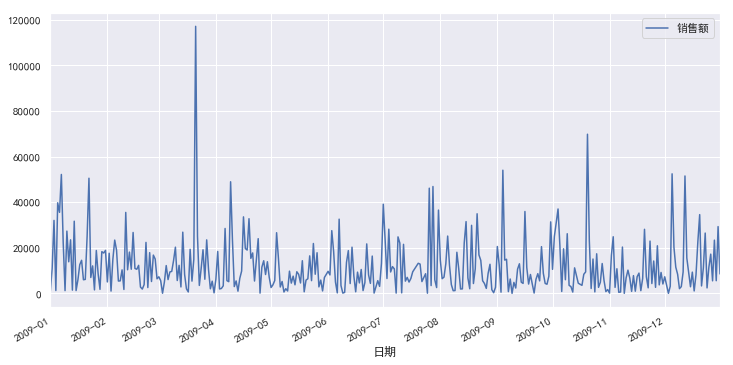

In [58]:
# 单独看一下某一年的
date_sales["2009":"2009"].plot(x='日期', y='销售额',figsize=(12, 6))

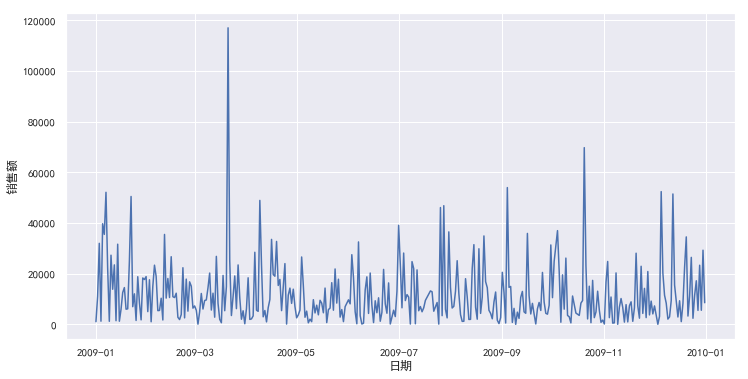

In [59]:
# 单独看一下某一年的
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.lineplot(x="日期", y="销售额", data=date_sales["2009":"2009"], ax=ax)